[*********************100%***********************]  3 of 3 completed
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')  # Ensure no remaining NaNs


Data Loaded
Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Summary Statistics:
 Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      70.089251   310.253155   111.438965
std        4.889919   111.250656   110.120450
min       62.637585   157.328613     9.578000
25%       66.314072   214.822338    17.066167
50%       68.888947   275.812302    25.043000
75%       73.807495   402.297523   216.865002
max       79.812904   584.590027   409.970001


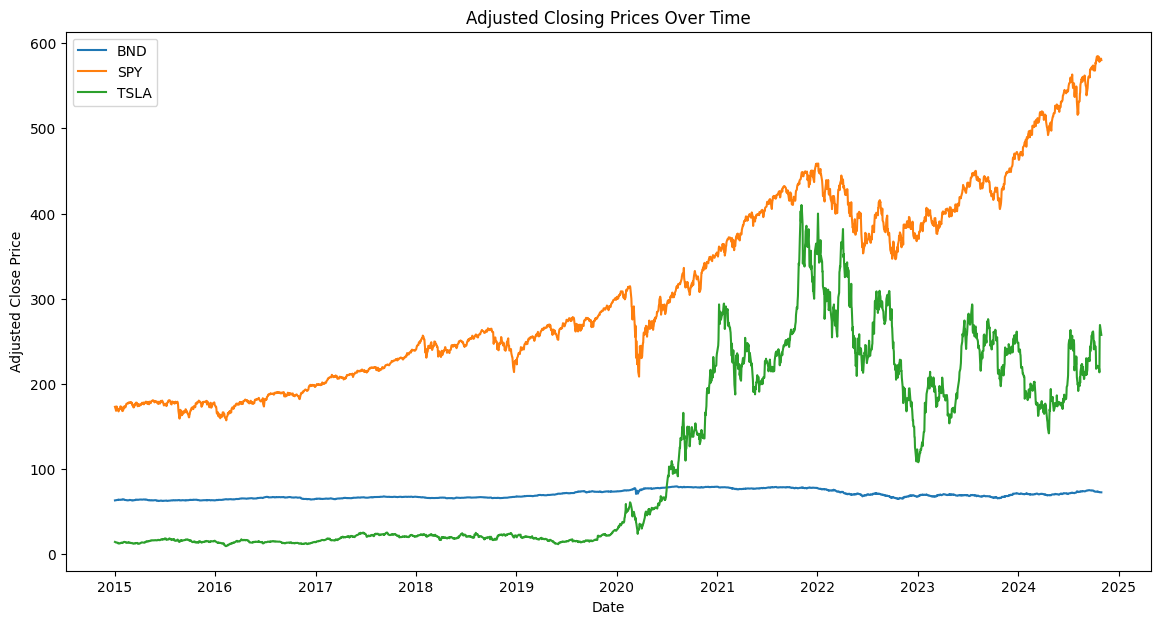

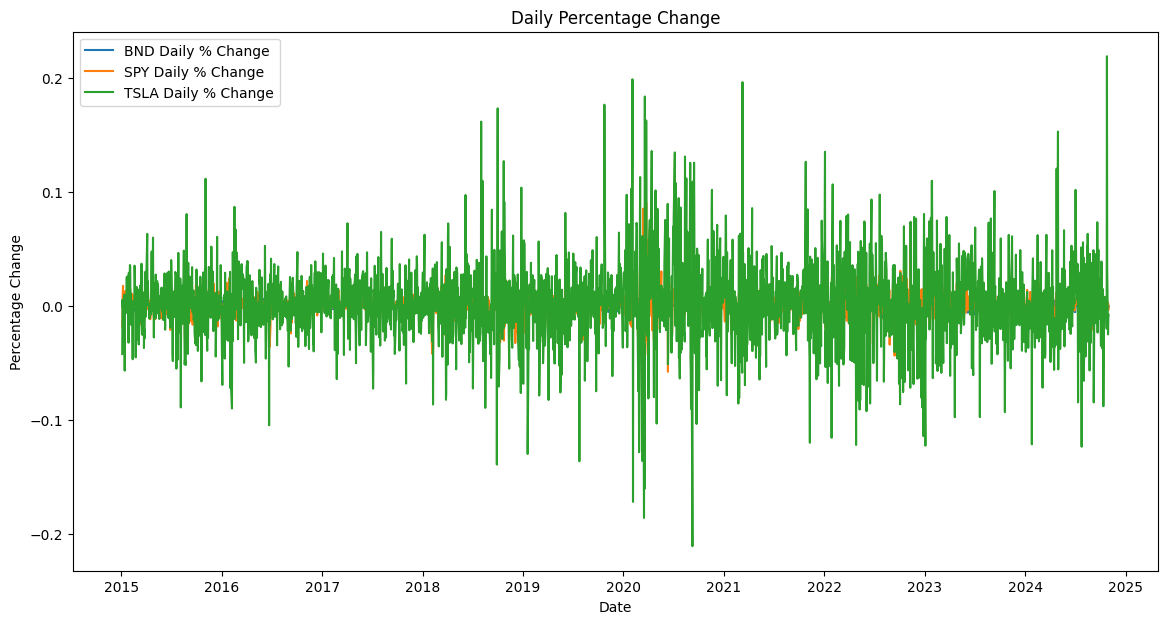

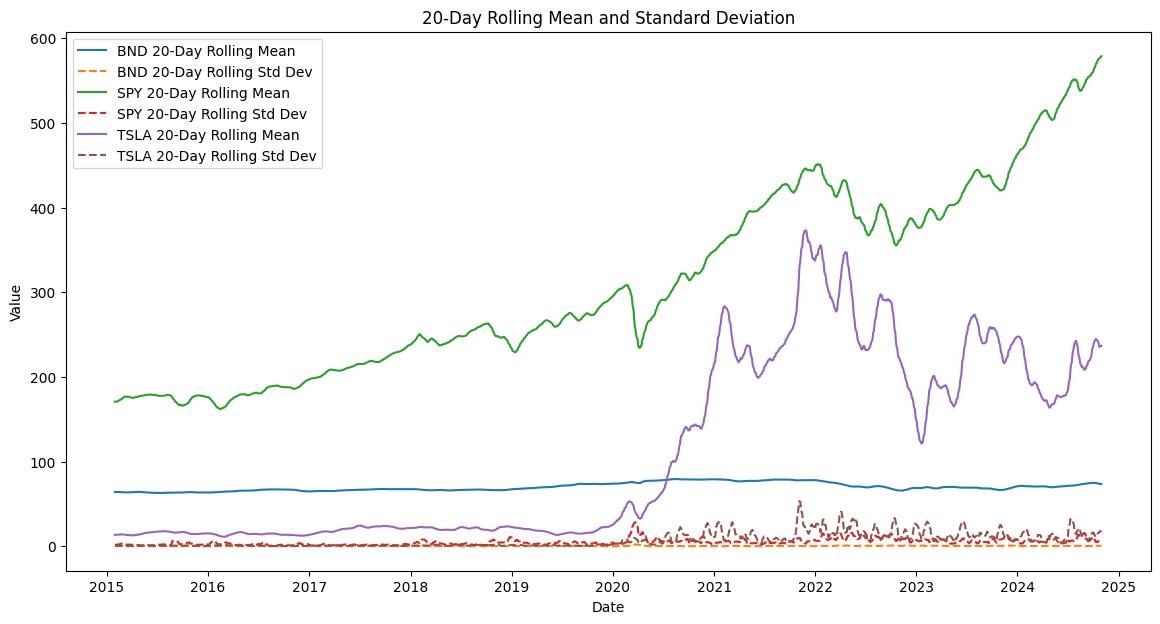

Outliers:
       BND  SPY     TSLA
0     NaN  NaN      NaN
1     NaN  NaN      NaN
2     NaN  NaN      NaN
3     NaN  NaN      NaN
4     NaN  NaN      NaN
...   ...  ...      ...
2468  NaN  NaN  0.21919
2469  NaN  NaN      NaN
2470  NaN  NaN      NaN
2471  NaN  NaN      NaN
2472  NaN  NaN      NaN

[2473 rows x 3 columns]


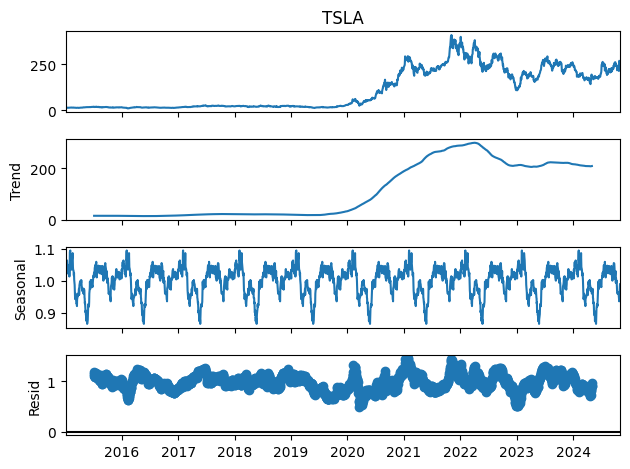

Value at Risk (5% confidence):
 Ticker
BND    -0.004798
SPY    -0.016764
TSLA   -0.051257
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
BND    -0.004994
SPY     0.042373
TSLA    0.048033
dtype: float64


In [2]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Step 1: Load data
data = load_data(tickers, start_date, end_date)
print("Data Loaded")

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)


In [2]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")


[*********************100%***********************]  3 of 3 completed

Data saved as cleaned_financial_data.csv



C:\Users\Naim\AppData\Local\Temp\ipykernel_23016\1069630514.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


#  Time Series Forecasting Models Before Stationary


C:\Users\Naim\AppData\Local\Temp\ipykernel_23016\1919297507.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='ffill')  # forward fill
C:\Users\Naim\AppData\Local\Temp\ipykernel_23016\1919297507.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = tsla_data.fillna(method='bfill')  # backward fill


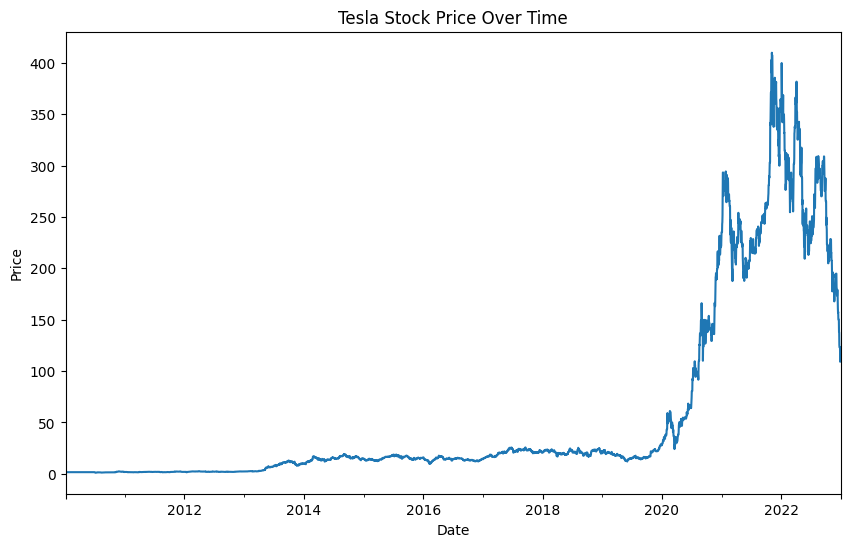

ARIMA - MAE: 176.64235494149378, RMSE: 192.60458898211837, MAPE: 72.02434463594818
SARIMA - MAE: 166.81406421363562, RMSE: 182.42111128379335, MAPE: 67.89520435897064
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0127
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.9933e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 3.9680e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.2462e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.8563e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 3.6417e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 4.1584e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.9762e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 3.2908e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 2.7007e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
LSTM - MAE: 1.5505109303521576, RMSE: 2.057554201208008, MAPE: 5.236531451969269


In [ ]:
# Load and Prepare Data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
tsla_data.index = pd.to_datetime(tsla_data.index)
tsla_data = tsla_data.asfreq('D')  # or 'M' for monthly, 'H' for hourly, etc.
# Fill NaN values
tsla_data = tsla_data.fillna(method='ffill')  # forward fill
# or
tsla_data = tsla_data.fillna(method='bfill')  # backward fill
# or
tsla_data = tsla_data.fillna(0)  # fill with zero


# Split Data
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data[:train_size].astype(float).dropna()
test_data = tsla_data[train_size:].astype(float).dropna()
tsla_data =tsla_data

# Visualization
plt.figure(figsize=(10, 6))
tsla_data.plot()
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Model Execution and Evaluation
try:
    mae_arima, rmse_arima, mape_arima = arima_model(train_data, test_data)
    if mae_arima:
        print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
except ValueError as e:
    print(f"Error: {e}")

mae_sarima, rmse_sarima, mape_sarima = sarima_model(train_data, test_data)
if mae_sarima is not None:
    print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")
else:
    print("SARIMA model could not be fitted due to an error.")

# Prepare LSTM Data for Training and Testing
train_X, train_y, scaler = prepare_lstm_data(train_data, look_back=60)
test_X, test_y, _ = prepare_lstm_data(test_data, look_back=60)

# LSTM Model Evaluation
mae_lstm, rmse_lstm, mape_lstm = lstm_model(train_data, test_data)
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}, MAPE: {mape_lstm}")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Load the data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')

# Define train data (80% of the historical data)
train_data = tsla_data[:int(len(tsla_data) * 0.8)]


C:\Users\Naim\AppData\Local\Temp\ipykernel_12412\528199037.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data = data['TSLA'].asfreq('D').fillna(method='ffill')


# Forecast Future Market Trends Before Stationary

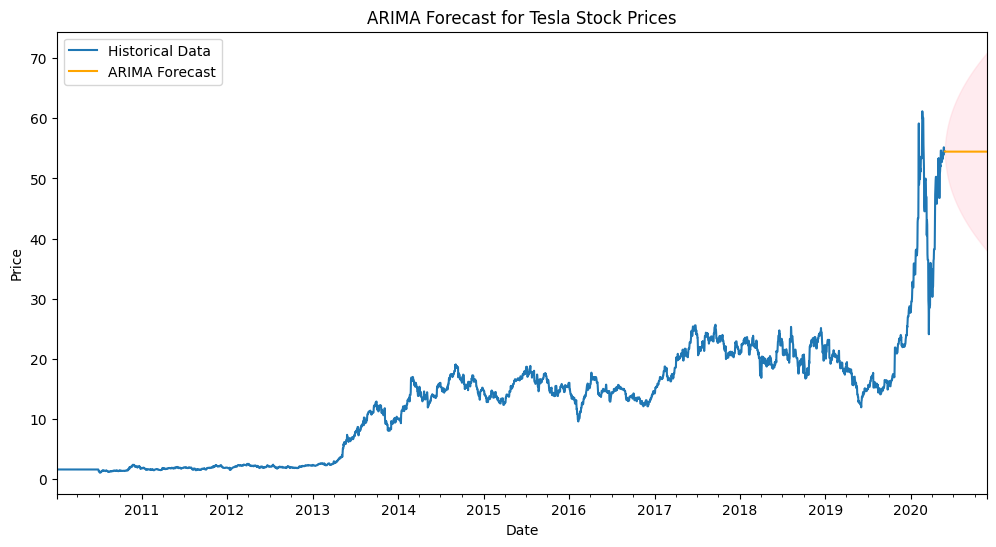

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:269: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"


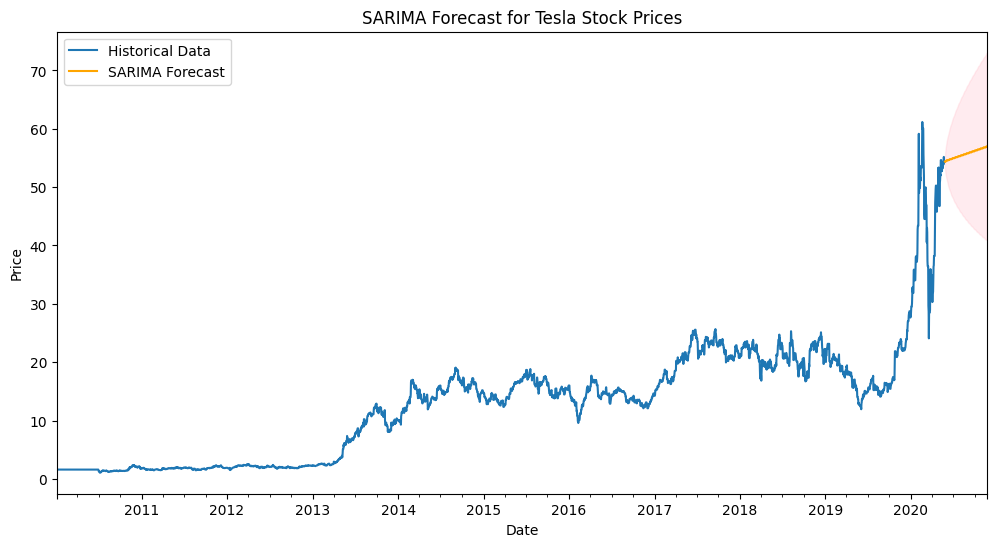

Trend Analysis:
The trend over the forecast period is upward.

Volatility and Risk Analysis:
The forecast includes confidence intervals, indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:269: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend_direction = "upward" if forecast_values[-1] > forecast_values[0] else "downward"
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0077
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.5791e-04
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 3.4641e-04
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 4.1928e-04
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 3.1482e-04
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.8300e-04
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 2.8901e-04
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.8923e-04
Epoch 9/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.4433e-04
Epoch 10/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.4803e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

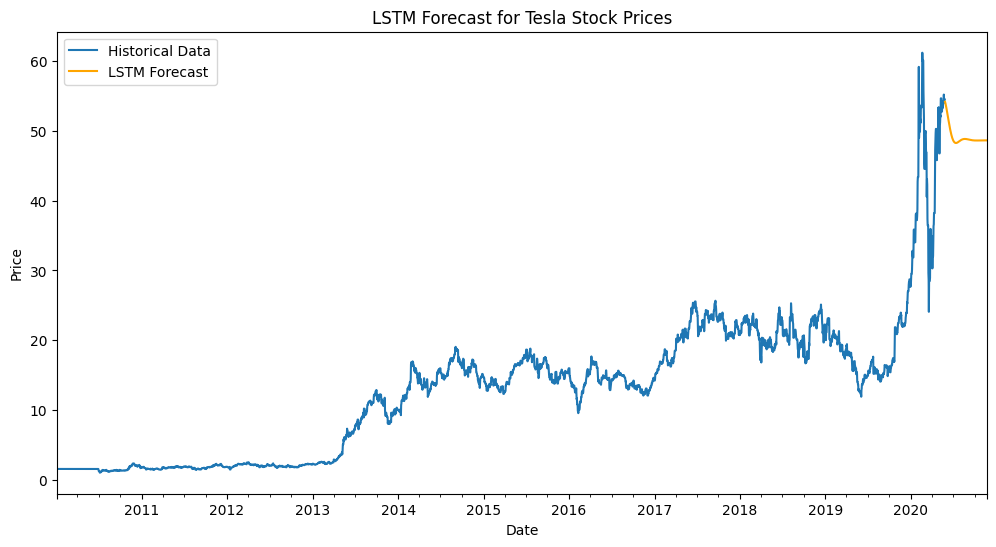

Trend Analysis:
The trend over the forecast period is downward.

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


In [2]:
from financial_analysis import forecast_and_analyze
# Run forecast and analysis for ARIMA
forecast_and_analyze(train_data, model_type="arima", forecast_period=180)

# Similarly, you can call SARIMA or LSTM forecasts
forecast_and_analyze(train_data, model_type="sarima", forecast_period=180)
forecast_and_analyze(train_data, model_type="lstm", forecast_period=180)


In [3]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
#data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")


Data saved as cleaned_financial_data.csv


C:\Users\Naim\AppData\Local\Temp\ipykernel_10208\236337357.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


ADF Statistic: -1.1507672706146044
p-value: 0.6944080657685303
Critical Values:
   1%: -3.433026277967909
   5%: -2.862722353917318
   10%: -2.56739941472018
The series is likely non-stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.


C:\Users\Naim\AppData\Local\Temp\ipykernel_10208\1128800319.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
C:\Users\Naim\AppData\Local\Temp\ipykernel_10208\1128800319.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
C:\Users\Naim\AppData\Local\Temp\ipykernel_10208\1128800319.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated freq

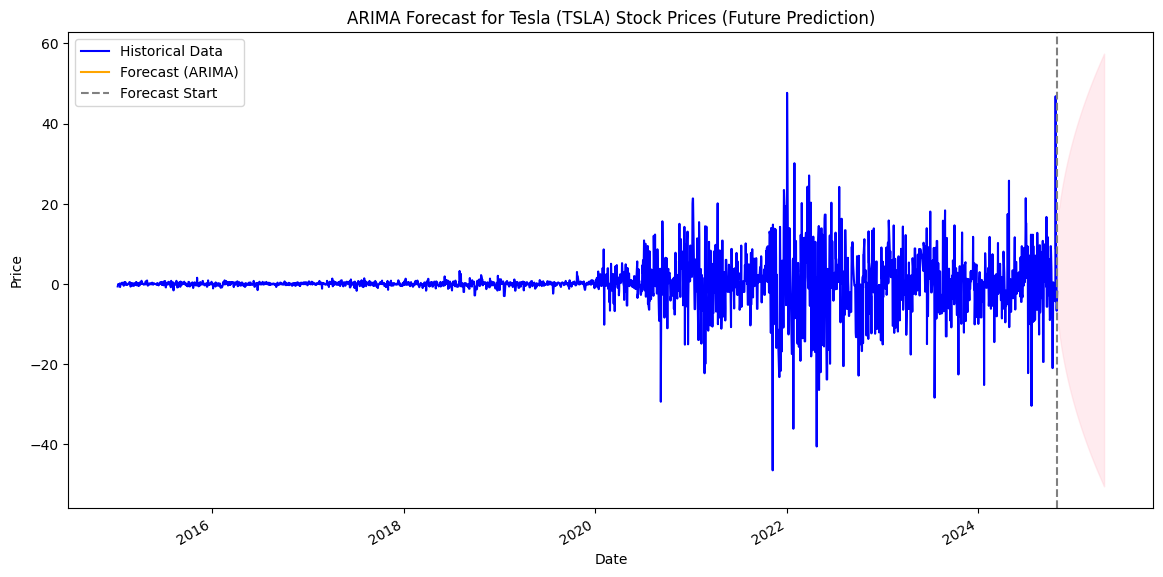

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

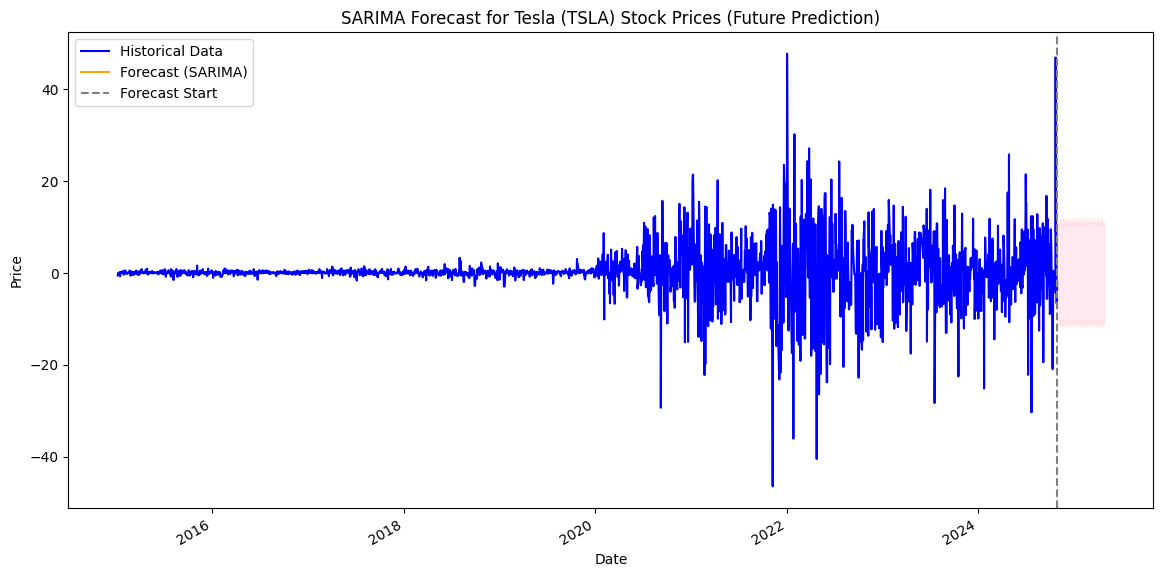

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0469
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0039
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0035
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0036
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0041
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0033
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0042
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0041
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0040
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0041
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

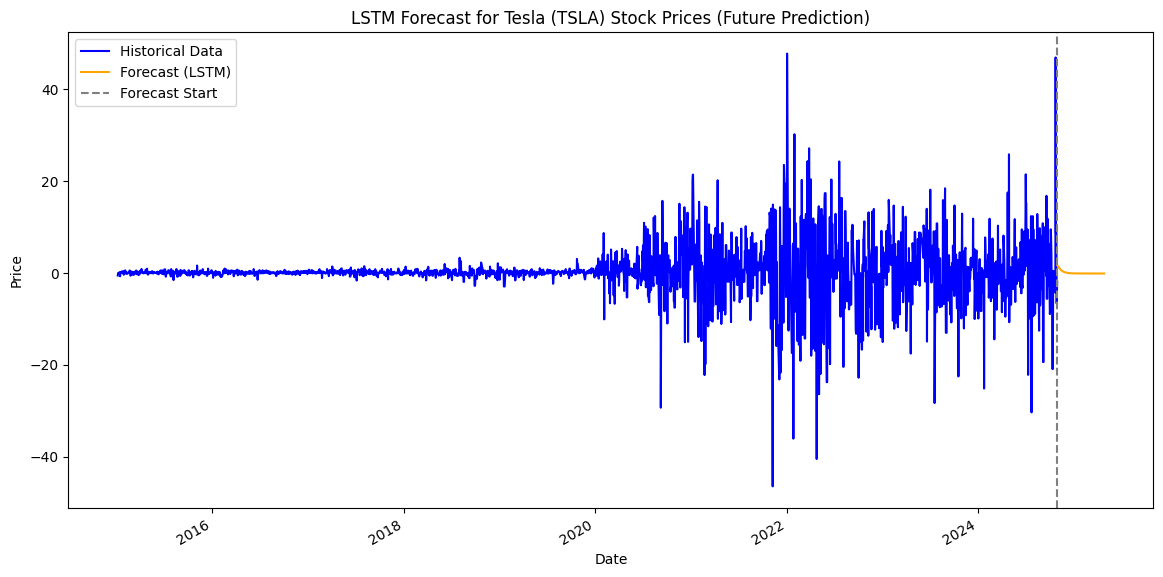

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

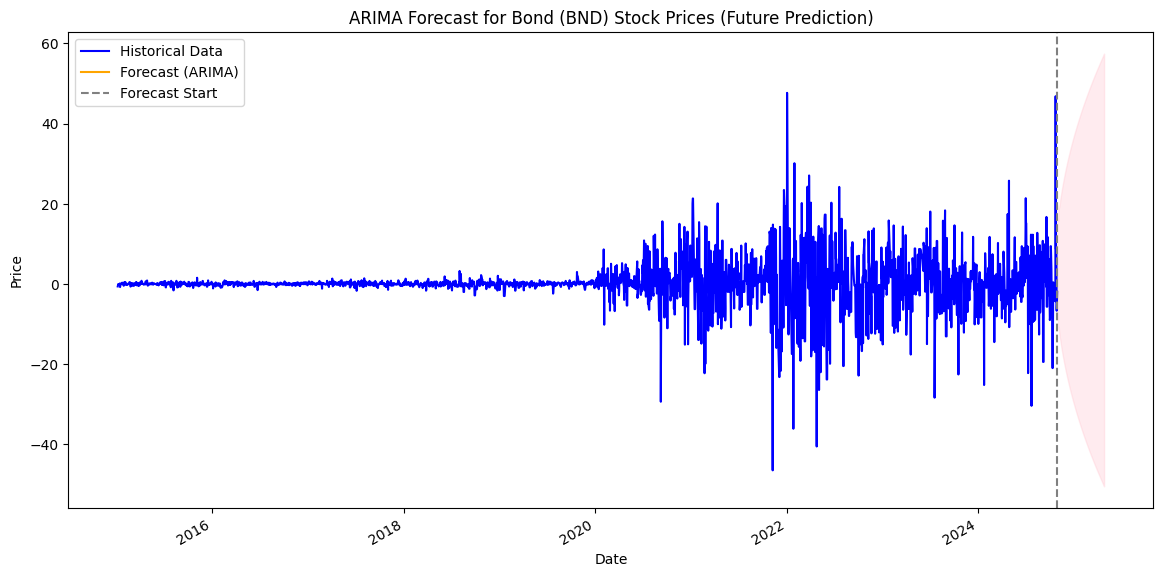

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

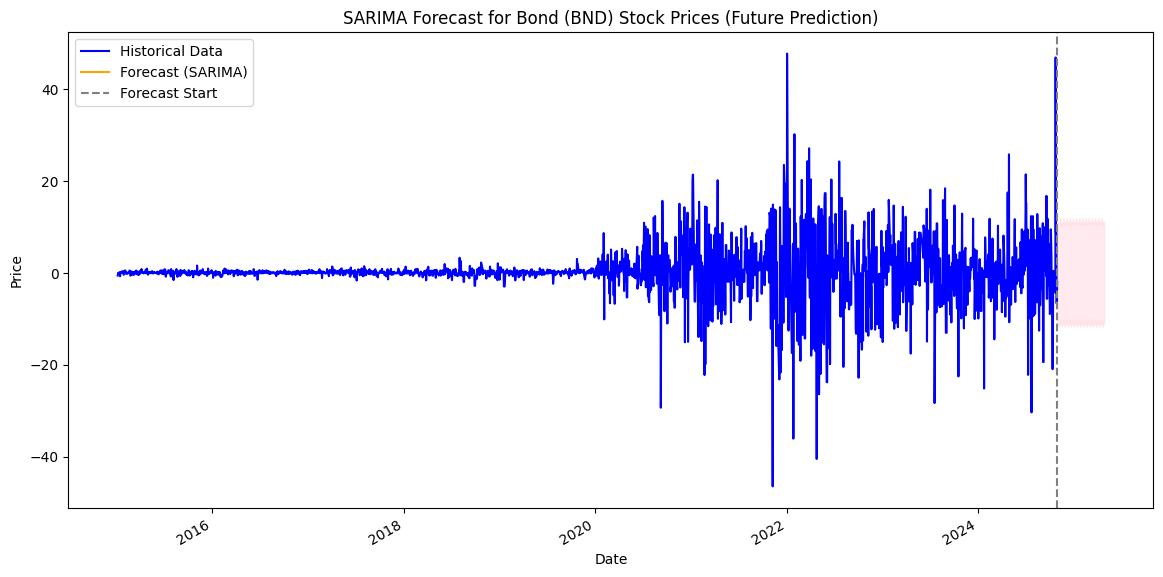

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0329
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0034
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0041
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0039
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0035
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0036
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0034
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0038
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0043
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━

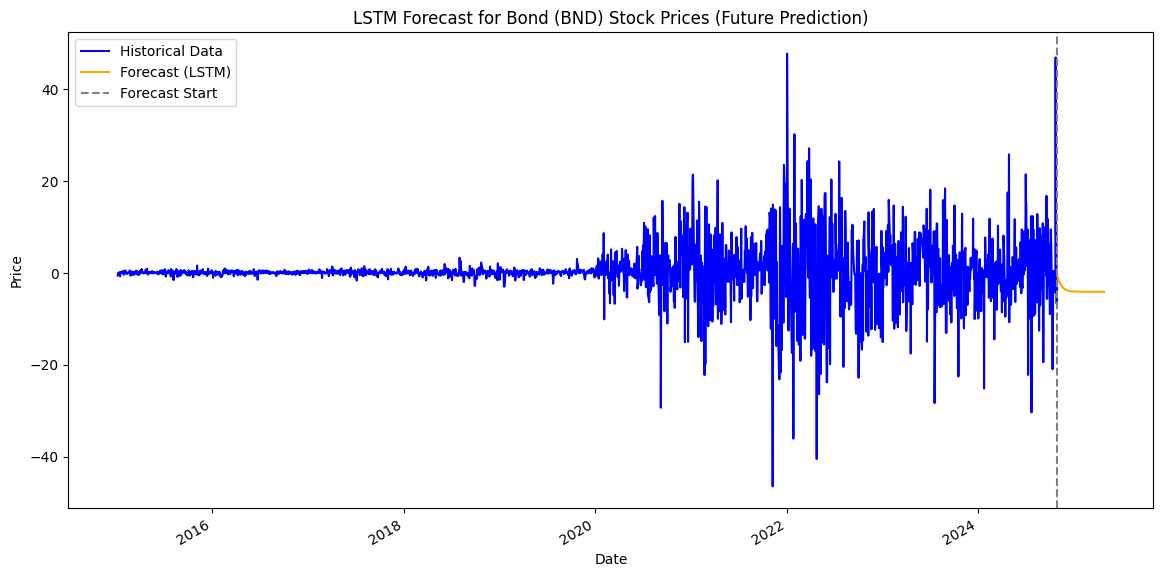

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

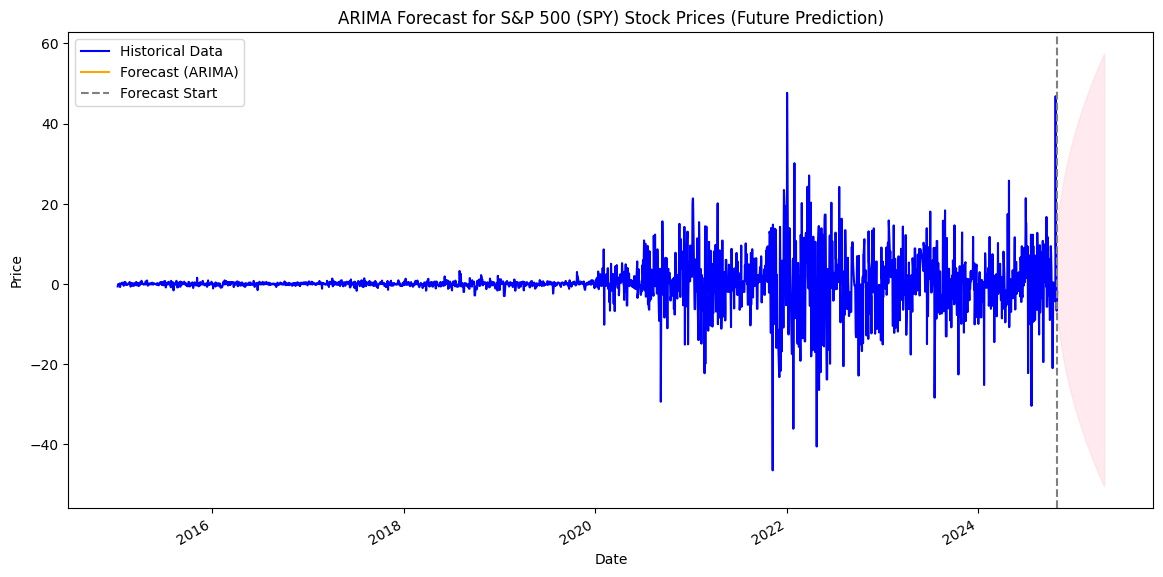

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

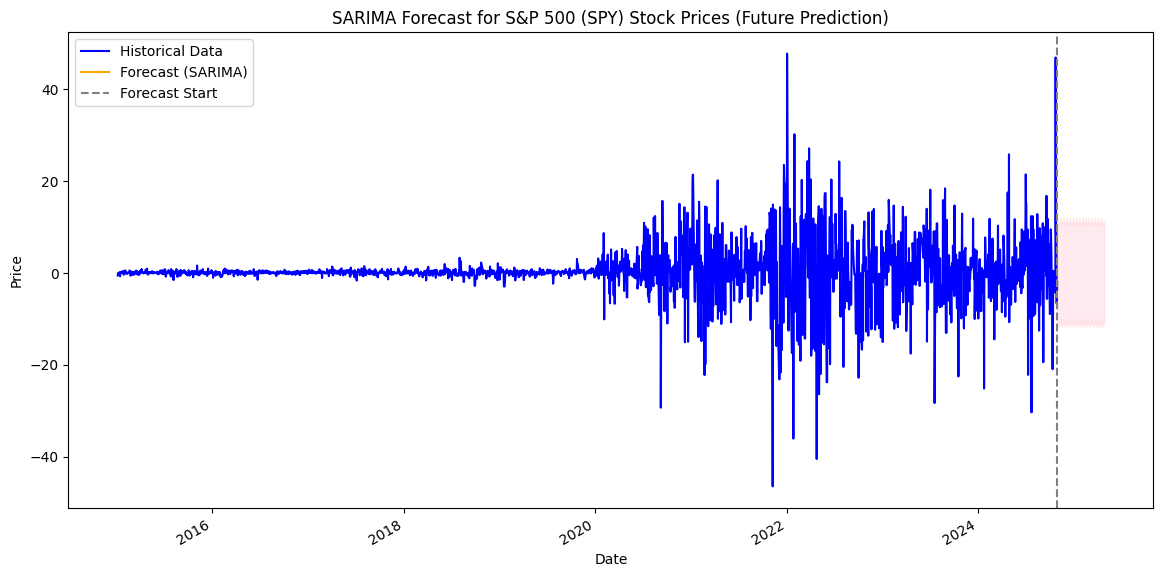

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0367
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0038
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0038
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0038
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0037
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0034
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0037
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0035
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0038
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━

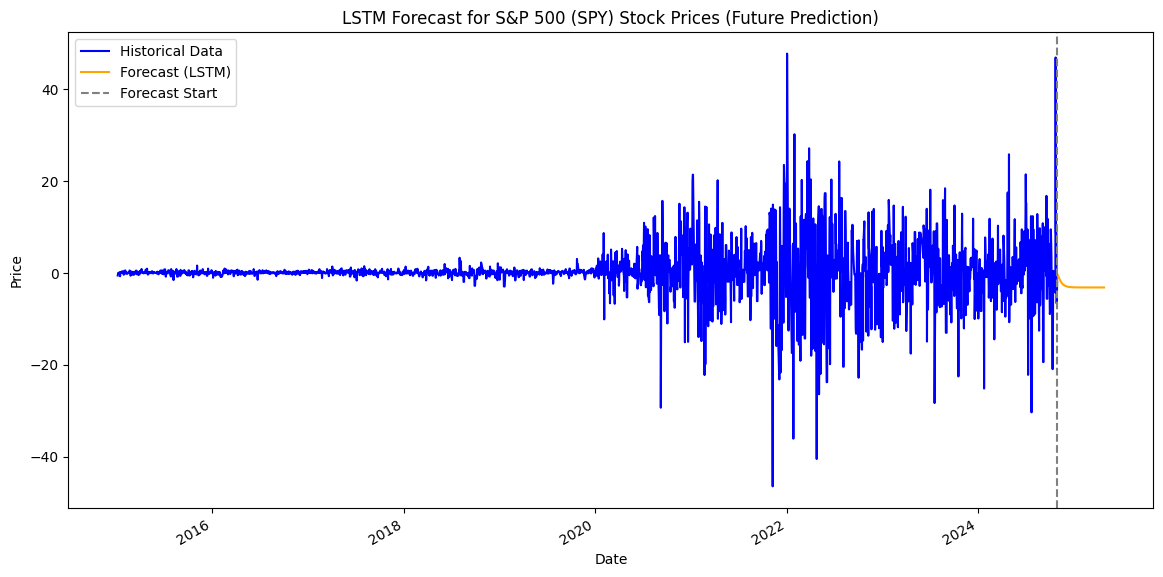

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.
LSTM Forecast for TSLA completed.
LSTM Forecast for BND completed.
LSTM Forecast for SPY completed.
Forecast DataFrame:
                                TSLA       BND       SPY
2024-10-30 00:00:00+00:00  1.645185 -0.576301 -0.211984
2024-10-31 00:00:00+00:00  1.560922 -0.738426 -0.358423
2024-11-01 00:00:00+00:00  1.476417 -0.912825 -0.499131
2024-11-02 00:00:00+00:00  1.393130 -1.089292 -0.635933
2024-11-03 00:00:00+00:00  1.311195 -1.262662 -0.770414


<Figure size 1000x600 with 0 Axes>

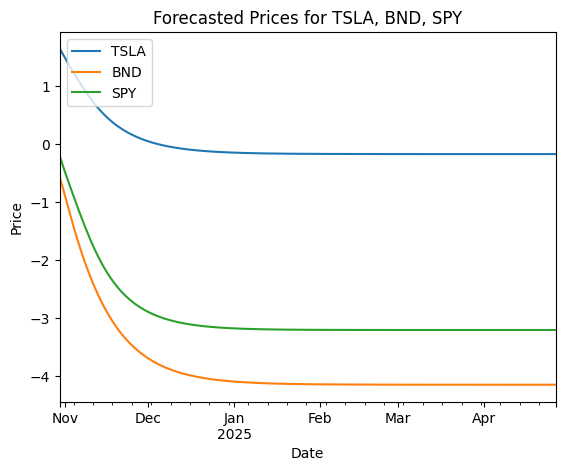

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from financial_analysis import forecast_and_analyze  # Import your forecast function here

# Load and Prepare Data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
bnd_data = data['BND']
spy_data = data['SPY']
check_stationarity(tsla_data) 
tsla_data_diff = tsla_data.diff().dropna()
bnd_data_diff = tsla_data.diff().dropna()
spy_data_diff = tsla_data.diff().dropna()
check_stationarity(tsla_data_diff) 
check_stationarity(bnd_data_diff)
check_stationarity(spy_data_diff) # Check stationarity again after differencing

# Convert to datetime and set frequency to daily
tsla_data_diff.index = pd.to_datetime(tsla_data_diff.index)
bnd_data_diff.index = pd.to_datetime(bnd_data_diff.index)
spy_data_diff.index = pd.to_datetime(spy_data_diff.index)
tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')

# Split Data (80% Train, 20% Test)
train_size = int(len(tsla_data_diff) * 0.8)
shared_train_dates = tsla_data_diff.sample(frac=0.8, random_state=42).sort_index().index

# Create train and test datasets for each asset using the same date range
train_data = tsla_data_diff.loc[shared_train_dates]
test_data = tsla_data_diff.drop(train_data.index)

train_data_bnd = bnd_data_diff.loc[shared_train_dates]
test_data_bnd = bnd_data_diff.drop(train_data.index)

train_data_spy = spy_data_diff.loc[shared_train_dates]
test_data_spy = spy_data_diff.drop(train_data.index)

# Forecast Period
forecast_period = 180

# Define a helper function to extract forecast
def extract_forecast(forecast_result, model_name, asset_name):
    if forecast_result is not None:
        print(f"{model_name} Forecast for {asset_name} completed.")
        return forecast_result['forecast']
    else:
        print(f"{model_name} Forecast for {asset_name} could not be generated.")
        return pd.Series([None] * forecast_period, index=pd.date_range(start=train_data.index[-1], periods=forecast_period, freq='D'))

# Generate Forecasts for each model and asset
arima_tsla = forecast_and_analyze(train_data, model_type="arima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
sarima_tsla = forecast_and_analyze(train_data, model_type="sarima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
lstm_tsla = forecast_and_analyze(train_data, model_type="lstm", forecast_period=forecast_period, asset_name="Tesla (TSLA)")

arima_bnd = forecast_and_analyze(train_data_bnd, model_type="arima", forecast_period=forecast_period, asset_name="Bond (BND)")
sarima_bnd = forecast_and_analyze(train_data_bnd, model_type="sarima", forecast_period=forecast_period, asset_name="Bond (BND)")
lstm_bnd = forecast_and_analyze(train_data_bnd, model_type="lstm", forecast_period=forecast_period, asset_name="Bond (BND)")

arima_spy = forecast_and_analyze(train_data_spy, model_type="arima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
sarima_spy = forecast_and_analyze(train_data_spy, model_type="sarima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
lstm_spy = forecast_and_analyze(train_data_spy, model_type="lstm", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")

# Extract the preferred forecasted prices for each asset
# Using LSTM model as specified
tsla_forecasted_prices = extract_forecast(lstm_tsla, "LSTM", "TSLA")
bnd_forecasted_prices = extract_forecast(lstm_bnd, "LSTM", "BND")
spy_forecasted_prices = extract_forecast(lstm_spy, "LSTM", "SPY")

# Combine these into a DataFrame for portfolio optimization
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices,
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})

# Convert 'None' values to NaN for compatibility and remove all-NaN columns
forecast_df = forecast_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Display the forecast data for verification
print("Forecast DataFrame:\n", forecast_df.head())


# Plot the forecasted data (if data exists)
if not forecast_df.empty:
    plt.figure(figsize=(10, 6))
    forecast_df.plot()
    plt.title('Forecasted Prices for TSLA, BND, SPY')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.show()
else:
    print("No valid forecast data to plot.")

